In [1]:
from main import *
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams["figure.figsize"] = [20,15]
matplotlib.rcParams.update({'font.size': 20})

In [2]:
def prepare_system(n = 100):
    thetas = np.linspace(0,2*np.pi,n+1)[:-1]
    z = np.cos(thetas) + 1j*np.sin(thetas)
    za = np.roll(z,-1).tolist()
    zb = np.roll(z, 1).tolist()
    z  = z.tolist()

    b = body(v=0.0+0.0j)
    panels = [hat_panel(b, za[i], z[i], zb[i], 0.0) for i in xrange(n)]

    s = system(bodies = [b])
    s.add_particle(uniform())
    #s.solvePanel()
    return s

In [3]:
def plot(s):
    fig,ax = plt.subplots(2,1)
    s.plot(ax[0])
    s.plot_vel_field(-2,-2,20,2,40,40,ax[1])
    s.plot(ax[1])
    ax[0].set_aspect(1)
    ax[1].set_aspect(1)
    plt.show()

# Solution methodology:

## Preparing the system
A uniform velocity field is introduced. Panels are introduced

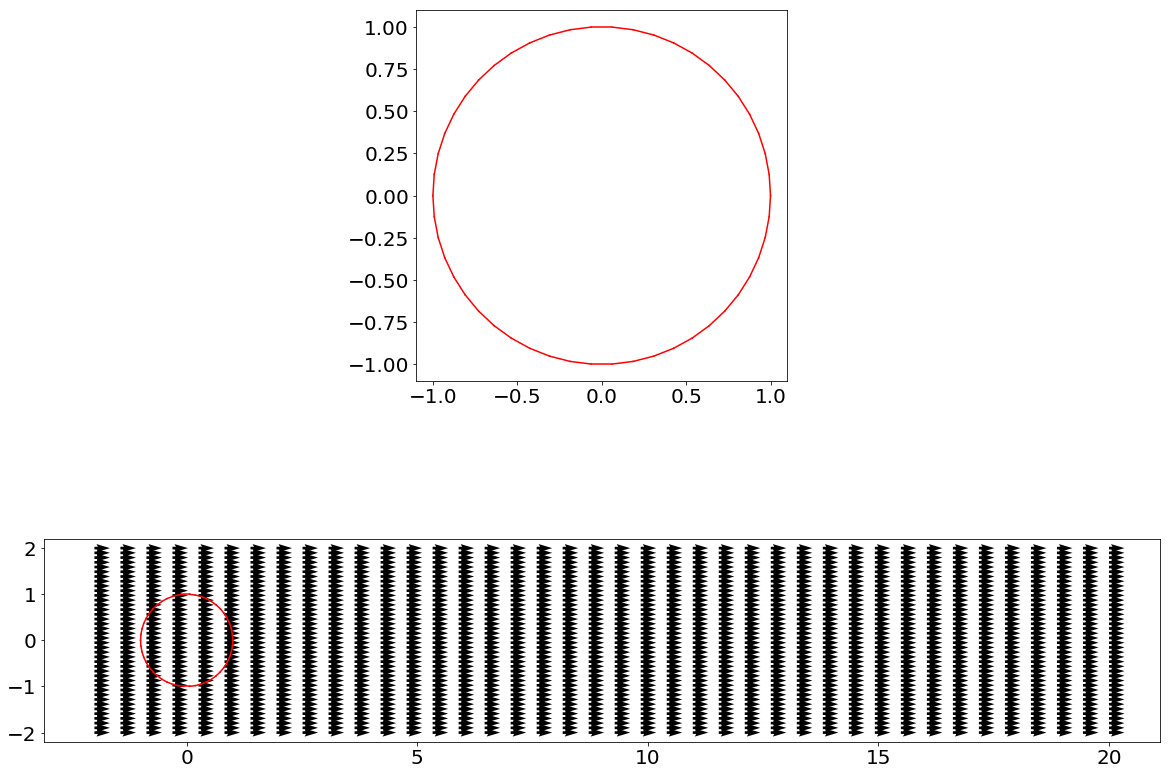

In [4]:
s = prepare_system(50); plot(s)

## Advection
Here, first, panel metod is solved, followed by RK step 1. After that, panel method is solved again, followed by RK step 2. Since there are no vortices initially, nothing is advected, just the panel method is solved.

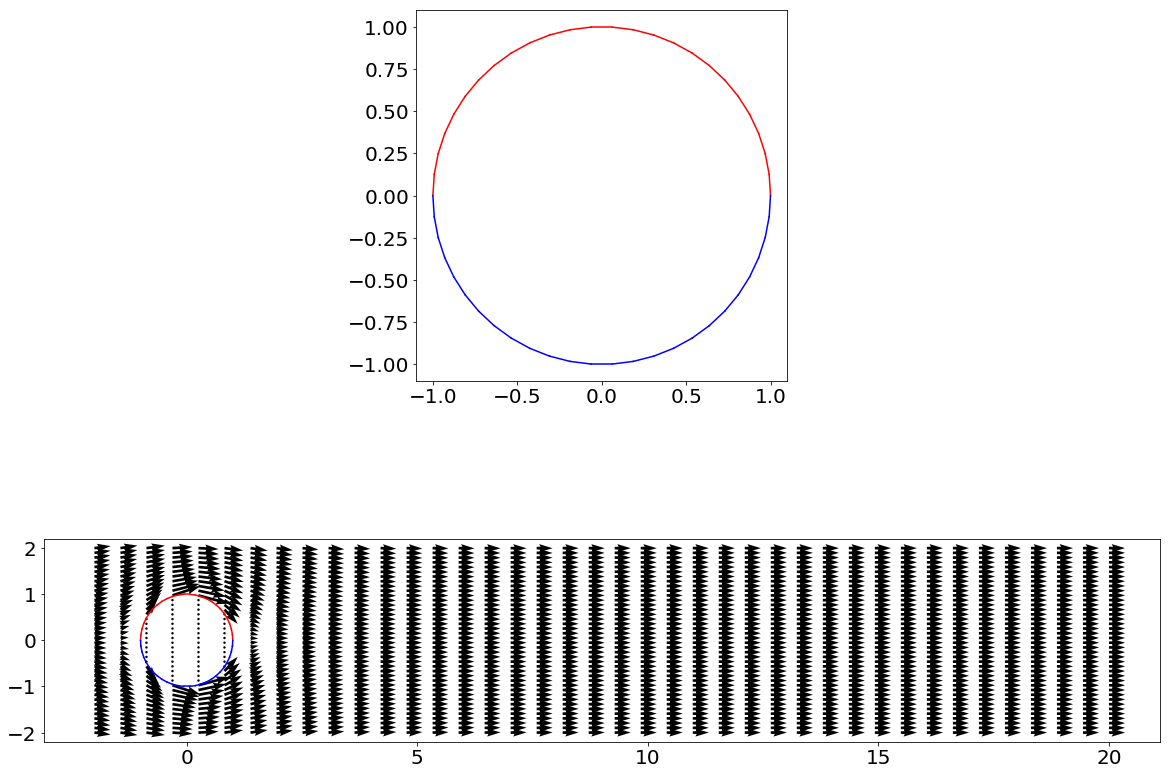

In [5]:
s.advect(0.1); plot(s)

## Satisfy slip
Now, blobs are introduced over the panels such that

\begin{align}
\Gamma_{blob} & = (\Gamma_{1,panel} + \Gamma_{2,panel})*\lambda_{panel} \\
\delta_{blob} & = \frac{\lambda_{panel}}{\pi} \\
\end{align}

This essentially introduces a blob above the panel such that $V_{slip}$ reduces to $\frac{V_{slip}}{2}$
On solving the panel method again, the effect of the reflection of the blob is produce, taking $V_{slip}$ to $0$

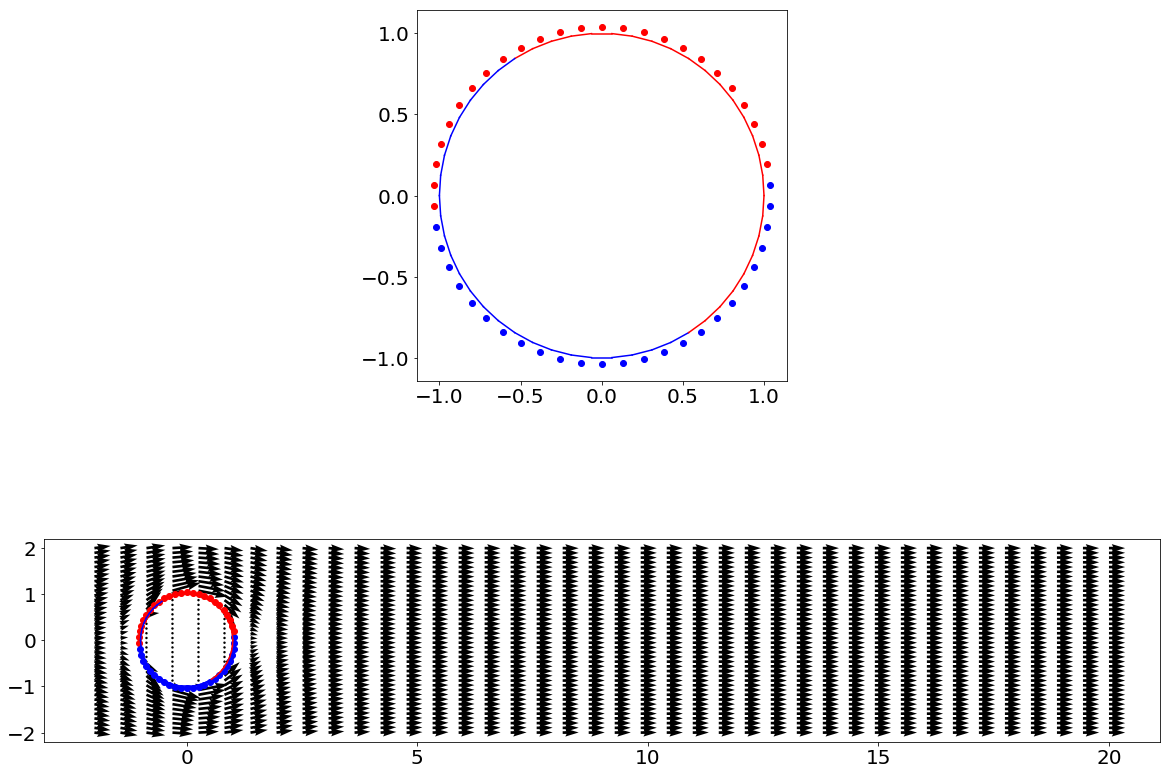

In [6]:
s.satisfy_no_slip();s.solvePanel()
plot(s)

## Diffusion
The vortices are first split up such that the strength of each vortex is less than $\Gamma_{max}$
Each vortex is than displaced (with a standard deviation of $\sqrt{4\nu\Delta t}$) to simulate the effect of viscosity

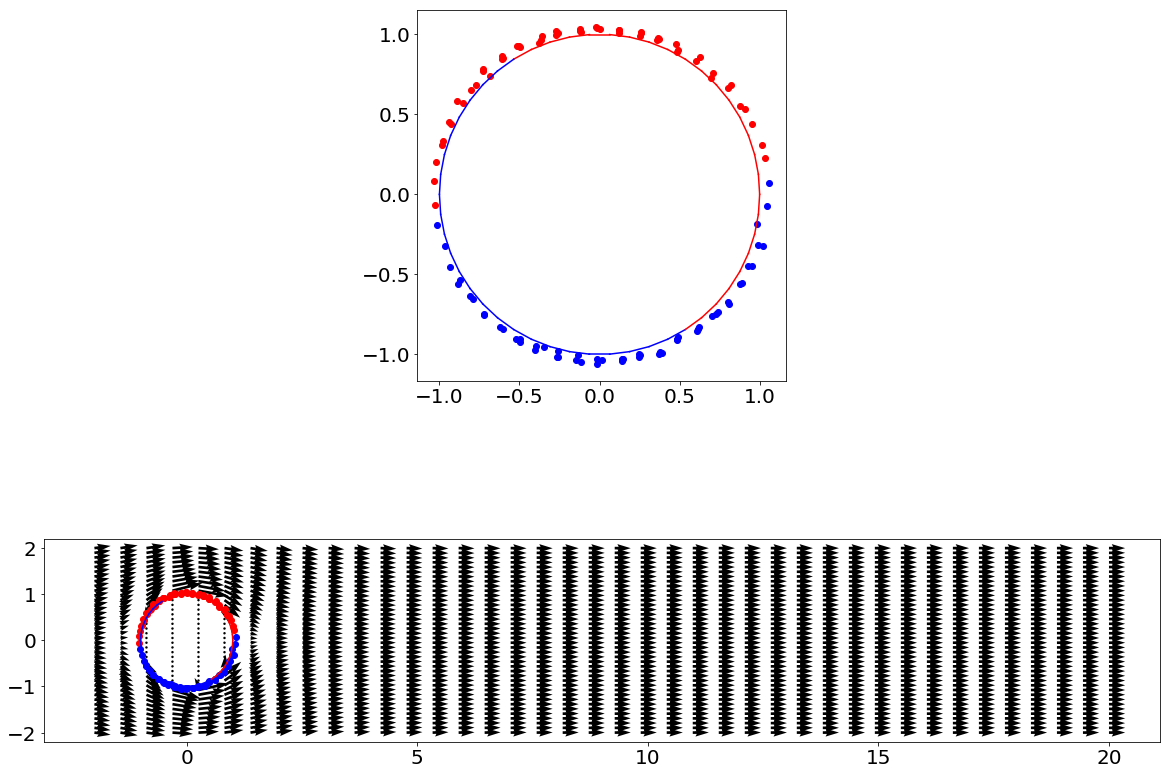

In [7]:
s.diffuse(0.1); plot(s)

## Reflection
Particles that stray inside the cylinder are reflected out

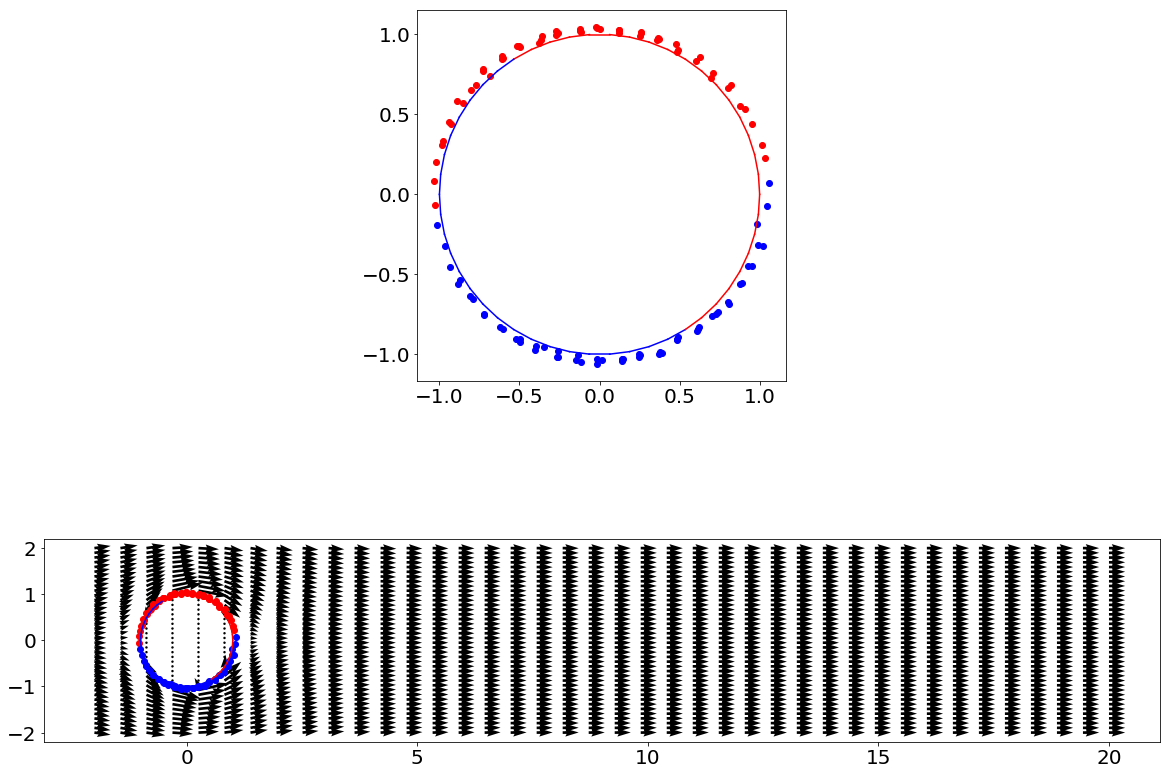

In [8]:
s.reflect(1.0);plot(s)

These steps are repeated in a loop to generate the simulation